In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Read the csv data into a dataset
df = pd.read_csv('data/crime2019.csv')

## Viewing the Data

In [3]:
#Let's take a look
df

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
0,2019821624,2019821624299900,2999,0,criminal-mischief-other,public-disorder,12/31/2019 8:49:00 PM,NaN,12/31/2019 10:00:00 PM,2500 BLOCK N WILLIAMS ST,3150215.0,1699739.0,-104.965744,39.753376,2,211,whittier,1,0,1
1,2019505232,2019505232299900,2999,0,criminal-mischief-other,public-disorder,8/10/2019 6:15:00 PM,8/10/2019 6:32:00 PM,8/10/2019 6:32:00 PM,25 E 16TH AVE,3144388.0,1695524.0,-104.986553,39.741898,6,621,north-capitol-hill,1,0,1
2,2019491524,2019491524299900,2999,0,criminal-mischief-other,public-disorder,8/4/2019 7:56:00 PM,NaN,8/4/2019 9:50:00 PM,490 N BRYANT ST,3135834.0,1688581.0,-105.017102,39.722966,4,411,valverde,1,0,1
3,2019292815,2019292815299900,2999,0,criminal-mischief-other,public-disorder,5/9/2019 10:58:00 PM,NaN,5/10/2019 12:08:00 PM,1550 COURT PL,3143674.0,1695456.0,-104.989093,39.741722,6,611,cbd,1,0,1
4,2019815832,2019815832299900,2999,0,criminal-mischief-other,public-disorder,12/23/2019 8:30:00 AM,NaN,12/29/2019 1:11:00 AM,490 W COLFAX AVE,3142418.0,1694739.0,-104.993574,39.739773,6,611,civic-center,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62938,20226015361,20226015361230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,8/12/2019 2:35:00 PM,8/12/2022 2:35:00 PM,8/12/2022 2:53:00 PM,57 N ZENOBIA ST,3125971.0,1686535.0,-105.052201,39.717488,4,411,barnum-west,1,0,1
62939,20195005224,20195005224100600,1006,0,kidnap-adult-victim,all-other-crimes,3/17/2019 9:45:00 PM,NaN,3/17/2019 9:45:00 PM,17783 E ADA DR.,2.5,2.5,-115.464056,34.638240,NaN,999,NaN,1,0,1
62940,20195005224,20195005224110200,1102,0,sex-aslt-rape,sexual-assault,3/17/2019 9:45:00 PM,NaN,3/17/2019 9:45:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,999,NaN,1,0,1
62941,20225003105,20225003105100600,1006,0,kidnap-adult-victim,all-other-crimes,3/9/2019 1:23:00 AM,NaN,9/14/2022 5:00:00 PM,1942 MARKET ST,3142369.0,1699582.0,-104.993652,39.753068,6,612,union-station,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62943 entries, 0 to 62942
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   incident_id             62943 non-null  int64  
 1   offense_id              62943 non-null  int64  
 2   OFFENSE_CODE            62943 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  62943 non-null  int64  
 4   OFFENSE_TYPE_ID         62943 non-null  object 
 5   OFFENSE_CATEGORY_ID     62943 non-null  object 
 6   FIRST_OCCURRENCE_DATE   62943 non-null  object 
 7   LAST_OCCURRENCE_DATE    28680 non-null  object 
 8   REPORTED_DATE           62943 non-null  object 
 9   INCIDENT_ADDRESS        61899 non-null  object 
 10  GEO_X                   61899 non-null  float64
 11  GEO_Y                   61899 non-null  float64
 12  GEO_LON                 61899 non-null  float64
 13  GEO_LAT                 61899 non-null  float64
 14  DISTRICT_ID             62828 non-null

In [6]:
#Let's see how much we're missing.
df.isna().sum()

incident_id                   0
offense_id                    0
OFFENSE_CODE                  0
OFFENSE_CODE_EXTENSION        0
OFFENSE_TYPE_ID               0
OFFENSE_CATEGORY_ID           0
FIRST_OCCURRENCE_DATE         0
LAST_OCCURRENCE_DATE      34263
REPORTED_DATE                 0
INCIDENT_ADDRESS           1044
GEO_X                      1044
GEO_Y                      1044
GEO_LON                    1044
GEO_LAT                    1044
DISTRICT_ID                 115
PRECINCT_ID                   0
NEIGHBORHOOD_ID             752
IS_CRIME                      0
IS_TRAFFIC                    0
VICTIM_COUNT                  0
dtype: int64

In [7]:
# Half are missing LAST_OCCURRENCE_DATE, many are missing physical locations (GEO_X, GEO_Y, GEO_LON, GEO_LAT, NEIGHBORHOOD_ID) 
# but none are missing PRECINCT_IDs or FIRST_OCCURRENCE_DATEs

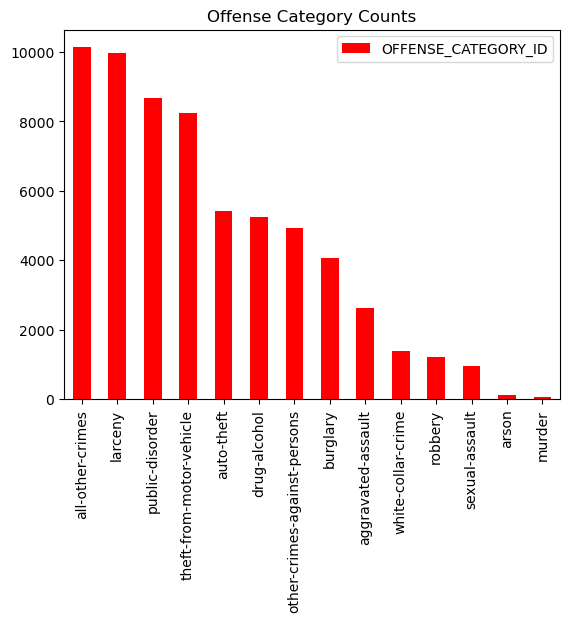

In [8]:
# Lets look at crimes by category
offense_counts = pd.DataFrame(df["OFFENSE_CATEGORY_ID"].value_counts())
offense_counts.plot(kind='bar', title="Offense Category Counts", color="red");

## Data Transformation

In [9]:
# Lets prepare the data to test our hypothesis that time of day and seasons affect the crime rate.

# Create a list of the columns to keep. As seen earlier, several columns were missing data. These 
# columns seem most reliable.
columns_to_keep = ['incident_id', 'PRECINCT_ID', 'FIRST_OCCURRENCE_DATE', 'OFFENSE_CATEGORY_ID']

# # Drop all columns not in the list
df = df[columns_to_keep]

In [10]:
# Convert 'FIRST_OCCURRENCE_DATE' column to datetime format. This is necessary for the following transformations
df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'])

# Create a new column 'TIME_OF_DAY' using the hour of the day and split it into simple timeframes of a day by hours:
# Night: 11PM-5AM, Morning: 5AM to 11AM, Afternoon: 11AM to 5PM, Evening: 5PM to 11PM

df['TIME_OF_DAY'] = pd.cut(df['FIRST_OCCURRENCE_DATE'].dt.hour,
                           bins=[-1, 5, 11, 17, 23],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Convert 'TIME_OF_DAY' column into dummy variables and add prefix 'TOD_' to each new column. We need the dummy variables
# because the model does not accept strings.
df = pd.get_dummies(df, columns=['TIME_OF_DAY'], prefix='TOD')

C:\Users\psaue\AppData\Local\Temp\ipykernel_13840\2304840064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'])
C:\Users\psaue\AppData\Local\Temp\ipykernel_13840\2304840064.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIME_OF_DAY'] = pd.cut(df['FIRST_OCCURRENCE_DATE'].dt.hour,


In [11]:
# Add a new column 'SEASON' using the month of the year
df['FIRST_OCCURRENCE_MONTH'] = df['FIRST_OCCURRENCE_DATE'].dt.month
df['SEASON'] = pd.cut(df['FIRST_OCCURRENCE_MONTH'], 
                      bins = [-1, 2, 5, 8, 11], 
                      labels = ['Winter', 'Spring', 'Summer', 'Fall'])

# Convert 'SEASON' column into dummy variables and add prefix 'SEASON_' to each new column
df = pd.get_dummies(df, columns=['SEASON'], prefix='SEASON')
df

,incident_id,PRECINCT_ID,FIRST_OCCURRENCE_DATE,OFFENSE_CATEGORY_ID,TOD_Night,TOD_Morning,TOD_Afternoon,TOD_Evening,FIRST_OCCURRENCE_MONTH,SEASON_Winter,SEASON_Spring,SEASON_Summer,SEASON_Fall
0,2019821624,211,2019-12-31 20:49:00,public-disorder,0,0,0,1,12,0,0,0,0
1,2019505232,621,2019-08-10 18:15:00,public-disorder,0,0,0,1,8,0,0,1,0
2,2019491524,411,2019-08-04 19:56:00,public-disorder,0,0,0,1,8,0,0,1,0
3,2019292815,611,2019-05-09 22:58:00,public-disorder,0,0,0,1,5,0,1,0,0
4,2019815832,611,2019-12-23 08:30:00,public-disorder,0,1,0,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62938,20226015361,411,2019-08-12 14:35:00,theft-from-motor-vehicle,0,0,1,0,8,0,0,1,0
62939,20195005224,999,2019-03-17 21:45:00,all-other-crimes,0,0,0,1,3,0,1,0,0
62940,20195005224,999,2019-03-17 21:45:00,sexual-assault,0,0,0,1,3,0,1,0,0
62941,20225003105,612,2019-03-09 01:23:00,all-other-crimes,1,0,0,0,3,0,1,0,0


In [12]:
# Group the data by 'PRECINCT_ID', and each of the four dummy variables and count the number of incidents in each group, 
# storing it in incident_id. We'll be replacing incident_id with our new crime count in the next line.

grouped = df.groupby(['PRECINCT_ID', 'TOD_Night', 'TOD_Morning', 'TOD_Afternoon', 'TOD_Evening',
                      'SEASON_Winter', 'SEASON_Spring', 'SEASON_Summer', 'SEASON_Fall'], 
                     as_index=False).agg({'incident_id': 'count'})

# Rename the 'incident_id' column to 'crime_count'
grouped.rename(columns={'incident_id': 'crime_count'}, inplace=True)
grouped

,PRECINCT_ID,TOD_Night,TOD_Morning,TOD_Afternoon,TOD_Evening,SEASON_Winter,SEASON_Spring,SEASON_Summer,SEASON_Fall,crime_count
0,111,0,0,0,1,0,0,0,0,33
1,111,0,0,0,1,0,0,0,1,118
2,111,0,0,0,1,0,0,1,0,143
3,111,0,0,0,1,0,1,0,0,118
4,111,0,0,0,1,1,0,0,0,74
...,...,...,...,...,...,...,...,...,...,...
745,999,1,0,0,0,0,0,0,0,5
746,999,1,0,0,0,0,0,0,1,9
747,999,1,0,0,0,0,0,1,0,11
748,999,1,0,0,0,0,1,0,0,13


In [13]:
# Lets provide a copy of the cleaned and transformed data
df.to_csv("data/ungrouped_data.csv")
grouped.to_csv("data/grouped_data.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62943 entries, 0 to 62942
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   incident_id             62943 non-null  int64         
 1   PRECINCT_ID             62943 non-null  int64         
 2   FIRST_OCCURRENCE_DATE   62943 non-null  datetime64[ns]
 3   OFFENSE_CATEGORY_ID     62943 non-null  object        
 4   TOD_Night               62943 non-null  uint8         
 5   TOD_Morning             62943 non-null  uint8         
 6   TOD_Afternoon           62943 non-null  uint8         
 7   TOD_Evening             62943 non-null  uint8         
 8   FIRST_OCCURRENCE_MONTH  62943 non-null  int64         
 9   SEASON_Winter           62943 non-null  uint8         
 10  SEASON_Spring           62943 non-null  uint8         
 11  SEASON_Summer           62943 non-null  uint8         
 12  SEASON_Fall             62943 non-null  uint8 

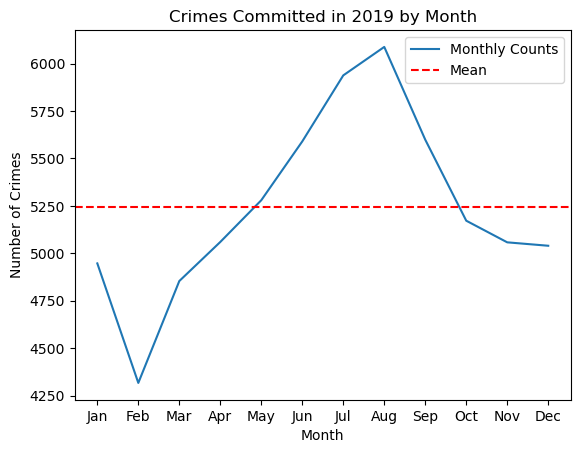

In [15]:
# Lets look at a monthly breakdown 


# Group the data by month and calculate the total number of crimes for each month
monthly_counts = df.groupby(df['FIRST_OCCURRENCE_DATE'].dt.month)['incident_id'].count()

# Plot the monthly counts as a line graph
plt.plot(monthly_counts.index, monthly_counts.values, label='Monthly Counts')

# Calculate the mean number of crimes per month
mean = monthly_counts.mean()

# Plot a line for the mean number of crimes
plt.axhline(mean, color='red', linestyle='--', label='Mean')

# Add a title and labels to the x and y axes
plt.title('Crimes Committed in 2019 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(monthly_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Add a legend
plt.legend()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

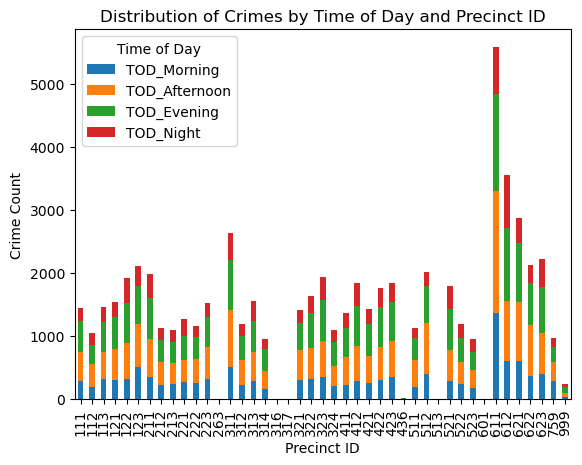

In [16]:
# Lets look at a breakdown of precinct specific crimes by time of day
# Group the data by precinct ID and sum the count of each TOD
group_plot = df.groupby(['PRECINCT_ID'])[['TOD_Morning', 'TOD_Afternoon', 'TOD_Evening', 'TOD_Night']].sum()

# Plot the distribution of crimes by time of day
plt.figure(figsize=(10,6))
group_plot.plot(kind='bar', stacked=True)

plt.xlabel('Precinct ID')
plt.ylabel('Crime Count')
plt.title('Distribution of Crimes by Time of Day and Precinct ID')
plt.legend(title='Time of Day')
plt.show()

## Creating and Training the Model

In [17]:
# Looks like season and time of day definitely correlate with crime rates so lets create a model with those columns as features
# Train a Random Forest Regressor to predict the number of crimes

# Define the features and target for the model
features = ['PRECINCT_ID', 'TOD_Night', 'TOD_Morning', 'TOD_Afternoon','TOD_Evening',
            'SEASON_Winter', 'SEASON_Spring', 'SEASON_Summer', 'SEASON_Fall']

# Crime count is the number of times each combination in the features occurs
target = 'crime_count'

In [18]:
# Split the grouped data into training and testing sets. Using 80% of the data for training, and 20% for testing
train_df, test_df = train_test_split(grouped, test_size=0.2, random_state=42)

In [19]:
# Create a RandomForestRegressor machine learning model
model = RandomForestRegressor()

# Train it using the features and target we defined earlier
model.fit(train_df[features], train_df[target])

RandomForestRegressor()

## Evaluating the Model

In [20]:
# Evaluate the model on the test set and print the accuracy
accuracy = model.score(test_df[features], test_df[target])
print('Accuracy:', accuracy)

Accuracy: 0.7004134531714277


In [21]:
# Lets check the Mean Absolute Error
y_pred = model.predict(test_df[features])
mae = mean_absolute_error(y_pred, test_df[target])

print(f'MAE: {mae}')

MAE: 23.720333333333333


# Using the Model

In [ ]:
# Create drop-down boxes for each feature
precinct_id = widgets.Dropdown(options=sorted(grouped.PRECINCT_ID.unique()), description='Precinct ID:')
time_of_day = widgets.Dropdown(options=['Night', 'Morning', 'Afternoon', 'Evening'], description='Time of Day:')
season = widgets.Dropdown(options=['Winter', 'Spring', 'Summer', 'Fall'], description='Season:')

# Create a button to run the prediction
run_button = widgets.Button(description='Run Prediction')
# # Create a button to clear the output
# clear_button = widgets.Button(description='Clear Output')

# Display the drop-down boxes and the button
display(precinct_id, time_of_day, season, run_button)

def run_prediction(b):
    # Get the selected values
    selected_precinct_id = precinct_id.value
    selected_time_of_day = time_of_day.value
    selected_season = season.value

    # Create a new dataframe with the selected values
    input_data = pd.DataFrame({
        'PRECINCT_ID': [selected_precinct_id],
        'TOD_Night': [1 if selected_time_of_day == 'Night' else 0],
        'TOD_Morning': [1 if selected_time_of_day == 'Morning' else 0],
        'TOD_Afternoon': [1 if selected_time_of_day == 'Afternoon' else 0],
        'TOD_Evening': [1 if selected_time_of_day == 'Evening' else 0],
        'SEASON_Winter': [1 if selected_season == 'Winter' else 0],
        'SEASON_Spring': [1 if selected_season == 'Spring' else 0],
        'SEASON_Summer': [1 if selected_season == 'Summer' else 0],
        'SEASON_Fall': [1 if selected_season == 'Fall' else 0],
    })

    # Make a prediction using the model
    prediction = model.predict(input_data[features])[0]
    print(f'Predicted crime count for Precinct: \033[4m{selected_precinct_id}\033[0m, Time of Day: \033[4m{selected_time_of_day}\033[0m, and Season: \033[4m{selected_season}\033[0m is: \033[4m{prediction}\033[0m')
    print(f'This means that {prediction} crimes will happen during the {selected_time_of_day} in {selected_season} in Precinct {selected_precinct_id} in a year.')

# def clear_output():
#     clear_output()
# Connect the button to the run_prediction function
run_button.on_click(run_prediction)
# clear_button.on_click(clear_output)
